### <span style="color:#FF884D"> Imports and data import </span>

In [1]:
# import numpy as np
import pandas as pd
import statsmodels as sm
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy import stats
import scipy.stats as stats
import plotly.express as px
import numpy as np

data = pd.read_csv("data.csv")
data.head(5)


,Unnamed: 0,Gender,Age,Sport Frequency,Type of Sport,Ever used Sportapp,Frequency Sportapp,Reason sportapp,Goals more efficient through sportapp,Motivation when comparing to friends,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation,track performance,mean of Intrinsic motivations
0,0,Weiblich,22,5,"Joggen, Ballsportarten (z.B. Fußball, Handball...",Ja,1,"Zum Tracken meiner Leistungen, Um mir Ziele zu...",Ja,Nein,1.25,2.75,4.00,3.50,4.25,4.25,1,4.000000
1,1,Weiblich,23,3,"Fitness-Kurse, Tanzen",Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,3.00,3.00,4.00,3.75,3.25,3.50,1,3.500000
2,2,Weiblich,25,3,"Joggen, Kraftsport, Ballsportarten (z.B. Fußba...",Ja,1,Zum Tracken meiner Leistungen,Ja,Nein,1.25,2.00,4.50,3.00,4.25,4.25,1,3.833333
3,3,Weiblich,18,3,"Kraftsport, Ballsportarten (z.B. Fußball, Hand...",Ja,1,"Zum Tracken meiner Leistungen, Um einen Sport-...",Ja,Nein,1.50,2.25,3.25,3.75,5.00,4.00,1,4.250000
4,4,Weiblich,18,1,"Ballsportarten (z.B. Fußball, Handball, Basket...",Ja,0,Zum Tracken meiner Leistungen,Ja,Nein,2.25,2.00,3.00,3.00,3.75,2.50,1,3.083333


### <span style="color:#FF884D"> Cohens d test to calculate effect size </span>

In [2]:
# cohens d to calculate effect size 
def cohens_d(group1,group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1,ddof=1)**2+np.std(group2,ddof=1)**2)/2)
    effect_size= mean_diff/pooled_std
    return effect_size

### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in the mean of intrinsic motivation between people who have used a sport app and people who have never used a sport app. </span>

In [6]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['mean of Intrinsic motivations']
group2 = data[data['Ever used Sportapp'] == 'Nein']['mean of Intrinsic motivations']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 1168.0
P-value: 0.004721430180981148
0.7810888732519061


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in Amotivation between people who have used a sport app and people who have never used a sport app. </span>

In [7]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['Amotivation']
group2 = data[data['Ever used Sportapp'] == 'Nein']['Amotivation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 818.0
P-value: 0.9902197397416197
-0.013534300394674945


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in Introjected Regulation between people who have used a sport app and people who have never used a sport app. </span>

In [8]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['Introjected Regulation']
group2 = data[data['Ever used Sportapp'] == 'Nein']['Introjected Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 1046.0
P-value: 0.06372638952872375
0.4882126876956859


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in External Regulation between people who have used a sport app and people who have never used a sport app. </span>

In [9]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['External Regulation']
group2 = data[data['Ever used Sportapp'] == 'Nein']['External Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 965.5
P-value: 0.2284553016991725
0.30360307899618216


### <span style="color:#FF884D"> Linear Regression </span>
### <span> H₀: There is no difference in intrinsic motivation among the groups based on the frequency of using the sports app.</span>

                                  OLS Regression Results                                 
Dep. Variable:     mean of Intrinsic motivations   R-squared:                       0.021
Model:                                       OLS   Adj. R-squared:                  0.013
Method:                            Least Squares   F-statistic:                     2.426
Date:                           Thu, 20 Jul 2023   Prob (F-statistic):              0.122
Time:                                   11:29:08   Log-Likelihood:                -140.26
No. Observations:                            113   AIC:                             284.5
Df Residuals:                                111   BIC:                             290.0
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

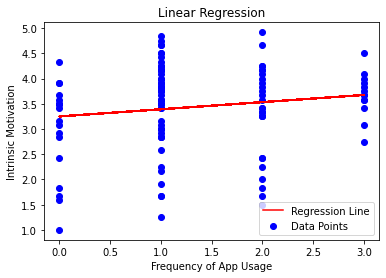

In [12]:
y = data['mean of Intrinsic motivations']
X = data['Frequency Sportapp']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# Plot the data points
# Plot the data points
plt.scatter(X.iloc[:, 1], y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X.iloc[:, 1], model.predict(X), color='red', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('Frequency of App Usage')
plt.ylabel('22Intrinsic Motivation')
plt.title('Linear Regression')

# Add legend
plt.legend()

# Display the plot
plt.savefig('lin_reg.pdf')
plt.show()

### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in the mean of Intrinsic motivation among the people who are more motivated when comparing to friends and people who are not more motivated when comparing to friends.</span>

In [26]:
# Separate the data into two groups based on sport app usage
# linear mixed effect models
# visualize motivations and for what reason ppl used the sport apps
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['mean of Intrinsic motivations']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['mean of Intrinsic motivations']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))

Mann-Whitney U statistic: 1919.0
P-value: 0.014386936578556568
0.4126320276868538


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in external regulation among the people who are more motivated when comparing to friends and people who are not more motivated when comparing to friends.</span>

In [27]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['External Regulation']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['External Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))

Mann-Whitney U statistic: 1900.5
P-value: 0.018726619742956665
0.41659707419517095


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in Introjected Regulation among the people who are more motivated when comparing to friends and people who are not more motivated when comparing to friends.</span>

In [28]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['Introjected Regulation']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['Introjected Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1724.5
P-value: 0.19265212187307523


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in Amotivation among the people who are more motivated when comparing to friends and people who are not more motivated when comparing to friends.</span>

In [29]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['Amotivation']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['Amotivation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1745.0
P-value: 0.149539378328904


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in the mean of Intrinsic motivation among the people who track there own performance and the people who do not track there performance.</span>

In [ ]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['mean of Intrinsic motivations']
group2 = data[data['track performance'] != 1]['mean of Intrinsic motivations']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1415.0
P-value: 0.1960649005814461



### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in External Regulation among the people who track there own performance and the people who do not track there performance.</span>

In [ ]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['External Regulation']
group2 = data[data['track performance'] != 1]['External Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1416.0
P-value: 0.1913369200804872



### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in Introjected Regulation among the people who track there own performance and the people who do not track there performance.</span>

In [ ]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['Introjected Regulation']
group2 = data[data['track performance'] != 1]['Introjected Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1498.5
P-value: 0.06409538701244916


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in Amotivation among the people who track there own performance and the people who do not track there performance.</span>

In [ ]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['Amotivation']
group2 = data[data['track performance'] != 1]['Amotivation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1207.0
P-value: 0.9440082756531538
